In [34]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))


import pandas as pd
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo
import hydra.model.helper as helper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# Load calcium
FILENAME = "2020-07-13-16-35-39-323801"
encoder = ForceEncoderEndo

calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 100, 100)

In [36]:
# Separate ecto and endo
ca_ecto = calcium[:, :50, :]
ca_endo = calcium[:, 50:, :]

In [38]:
# Encode force
fo_ecto = helper.encode_force_2d(ForceEncoderEcto, ca_ecto, 50, 100, 0.02, save_interval=5)
fo_endo = helper.encode_force_2d(ForceEncoderEndo, ca_endo, 50, 100, 0.02, save_interval=5)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:08<00:00, 1824.15it/s]


In [39]:
# Average force and save
fo_ecto_avg = helper.average_force(fo_ecto, 50, 100, 10, 20)
df = pd.DataFrame(fo_ecto_avg.reshape(-1, 200))
df.to_csv("./results/data/force/" + FILENAME + "_ecto.csv", index = False)

fo_endo_avg = helper.average_force(fo_endo, 50, 100, 10, 20)
df = pd.DataFrame(fo_endo_avg.reshape(-1, 200))
df.to_csv("./results/data/force/" + FILENAME + "_endo.csv", index = False)

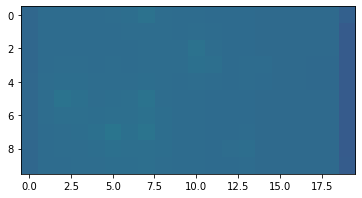

In [45]:
# Load to double check / compare
fo = pd.read_csv("./results/data/force/" + FILENAME + "_ecto" + ".csv")
fo = fo.values.reshape(-1, 10, 20)
plt.imshow(fo[100], vmin=0, vmax=4)

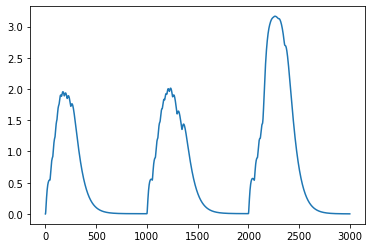

In [46]:
plt.figure()
plt.plot(fo[:, 0, 0])
plt.show()

In [4]:
fo.shape

(3000, 10, 20)

In [5]:
fo_front = fo[:, 3:7, :]
fo_left = fo[:, 0:2, :]
fo_right = fo[:, 8:10, :]

In [31]:
np.sum(fo_front[:500, :, :5])

10899.86561801458

In [32]:
np.sum(fo_left[:500, :, :5] + fo_right[:500, :, :5])

10934.468830037738